In [22]:
using PyPlot, Polynomials, CoolProp

# Thermodynamics
This section finds the correlations for the density, viscosity, and partition coefficient (in water/oil) of DME.

## A detour: viscosity measurements
Is it possible to measure DME-water viscosity in a tube?

In [9]:
Re = 200 # Reynolds number
ρ  = 1000 # [kg/m^3] density
L = 1.0   # [m] pipe length
D = 0.001 # [m] pipe diameter
μ = 0.001 # [Pa.s]
v = Re*μ/(ρ*D) # velocity
q = v*π*D^2/4  # [m^3/s] flow rate
println("flow rate is $(q*1e6*60) ml/min")
dp = 8*μ*L*q/(π*(D/2)^4) # [Pa] pressure drop
println("pressure drop is $(dp/100) mbar")

flow rate is 9.42477796076938 ml/min
pressure drop is 63.99999999999999 mbar


## Density of DME-water and DME-oil

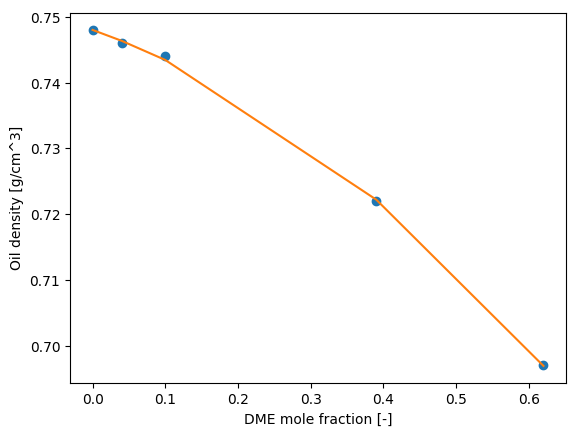

PyObject <matplotlib.text.Text object at 0x7f452e4bd750>

In [14]:
# Fig 4, SPE-177919, T = 70 degC, p = 2000 psi
x_DME_oil = [0.0, 0.04, 0.10, 0.39, 0.62]         # [mol frac]
ρ_oil     = [0.748, 0.746, 0.744, 0.722, 0.697]   # [g/cm^3]

rho_fit = polyfit(x_DME_oil, ρ_oil, 2)

plot(x_DME_oil, ρ_oil, "o", x_DME_oil, polyval(rho_fit, x_DME_oil))
xlabel("DME mole fraction [-]")
ylabel("Oil density [g/cm^3]")

## K-value

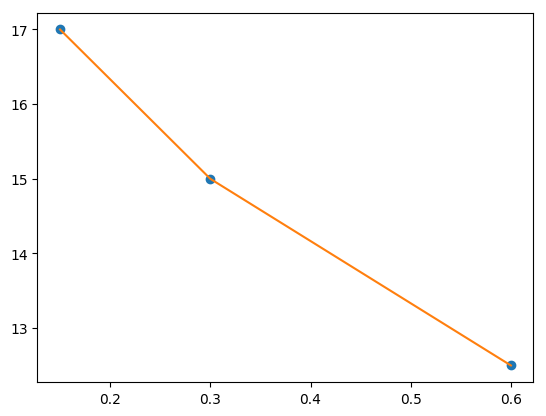

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f452e197750>
 PyObject <matplotlib.lines.Line2D object at 0x7f452e197850>

In [17]:
# experimental data from SPE-179771
# data for 1.4% brine and 71 degC and 2000 psia
x_DME_oil = [0.15, 0.30, 0.6]   # [mol frac]
K_value   = [17.0, 15.0, 12.5]  # [-]
K_fit = polyfit(x_DME_oil, K_value, 2)
plot(x_DME_oil, K_value, "o", x_DME_oil, polyval(K_fit,x_DME_oil))

# viscosity

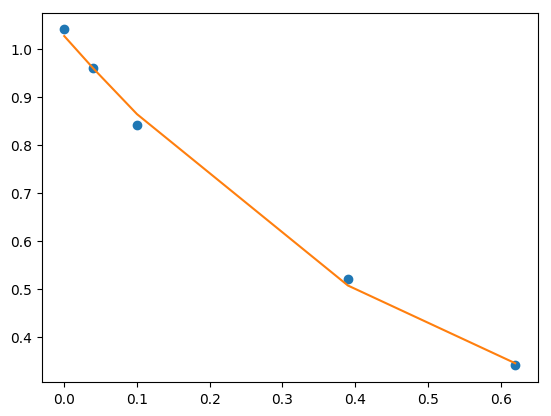

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f452e0017d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f452e0018d0>

In [19]:
# Fig 4, SPE-177919, T = 70 degC, p = 2000 psi
x_DME_oil = [0.0, 0.04, 0.10, 0.39, 0.62] # [mol frac]
μ_oil = [1.04, 0.96, 0.84, 0.52, 0.34]    # [cP]
mu_fit = polyfit(x_DME_oil, μ_oil, 2)
plot(x_DME_oil, μ_oil, "o", x_DME_oil, polyval(mu_fit, x_DME_oil))

For the viscosity of water with DME, I use the package coolprop to calculate the water viscosity at 70 degC and 2000 psi and assume a linear increase of viscosity when water is mixed with DME

In [25]:
T = 70 + 273.15 # [K] 
p = 2000/14.7   # [Pa]
mu_water = PropsSI("viscosity", "T", T, "P", p, "water") # [Pa.s]

1.1239875464426499e-5